PROJET Machine Learning - HUREL Jérémy, LEGRAND Paul, DANCKAERTS Kilian, CAUSSE Clara

## Installation et imporation des prérequis.

In [ ]:
!pip install emoji #librairie pour transformer les émojis en chaine de texte
!pip install nlpaug torch transformers #librairie pour faire de l'augmentation de données
!pip install googletrans #google traduction api


In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer #Import TfidfVectorizer
import emoji
import re
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.flow as nafc
from nlpaug.util import Action
import nltk
import googletrans



In [ ]:

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Chargement des données
df = pd.read_csv("/content/gdrive/MyDrive/dataset/scitweets_export.tsv", sep='\t')

# Analyse du jeu de données initiales

In [ ]:
display(df.head())
display(df.shape)

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


(1140, 7)

In [ ]:
from sklearn.model_selection import train_test_split

# # Séparer 90% et 10% aléatoirement
df, df_final_test = train_test_split(df, test_size=0.1, random_state=42)

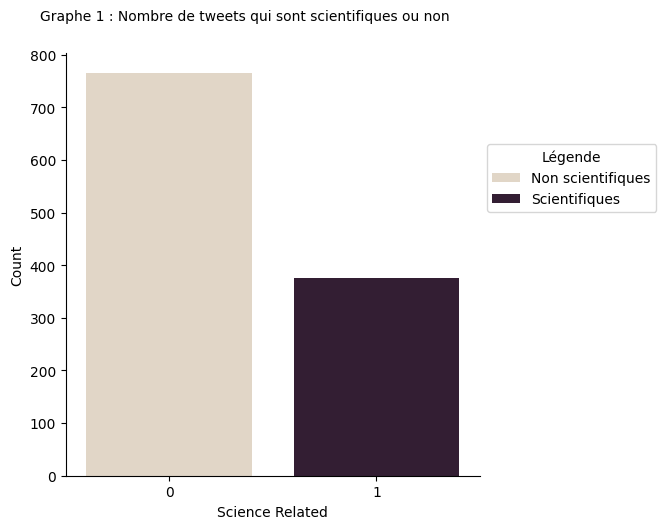

In [ ]:
p1 = sns.catplot(x="science_related", kind="count", palette="ch:.25", data=df)
p1.set_axis_labels("Science Related", "Count")
p1.fig.suptitle("Graphe 1 : Nombre de tweets qui sont scientifiques ou non",fontsize=10, y=1.05)
plt.legend(title="Légende", labels=["Non scientifiques", "Scientifiques"], loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()


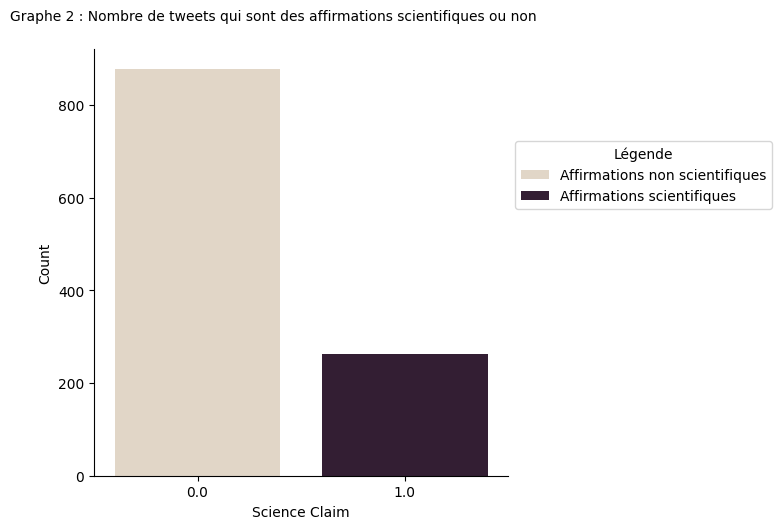

In [ ]:
p2  =sns.catplot(x="scientific_claim", kind="count", palette="ch:.25", data=df)
p2.set_axis_labels("Science Claim", "Count")
p2.fig.suptitle("Graphe 2 : Nombre de tweets qui sont des affirmations scientifiques ou non",fontsize=10, y=1.05)
plt.legend(title="Légende", labels=["Affirmations non scientifiques", "Affirmations scientifiques"], loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()

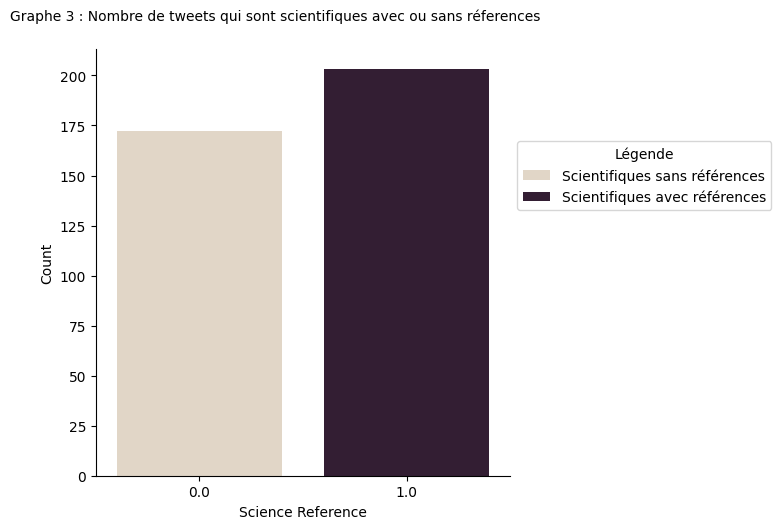

In [ ]:
p3 =(sns.catplot(x="scientific_reference", kind="count", palette="ch:.25", data=df[df['science_related'] == 1]))
p3.set_axis_labels("Science Reference", "Count")
p3.fig.suptitle("Graphe 3 : Nombre de tweets qui sont scientifiques avec ou sans réferences",fontsize=10, y=1.05)
plt.legend(title="Légende", labels=["Scientifiques sans références", "Scientifiques avec références"], loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()

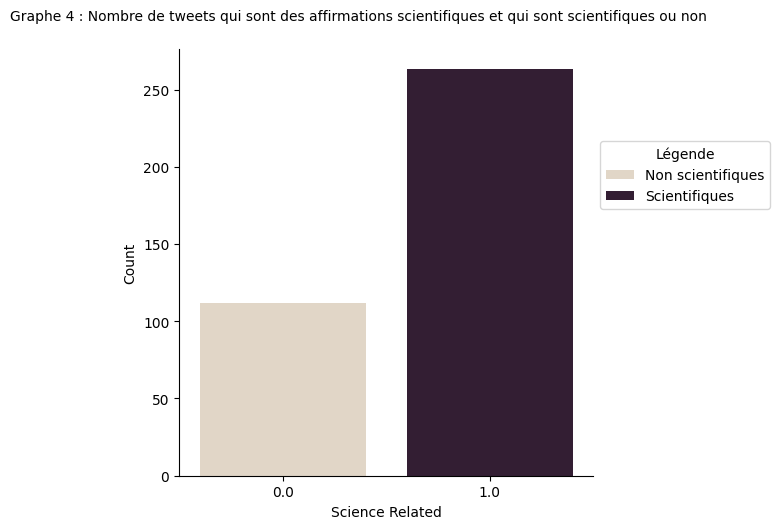

In [ ]:
p4 = sns.catplot(x="scientific_claim", kind="count", palette="ch:.25", data=df[df['science_related'] == 1])
p4.set_axis_labels("Science Related", "Count")
p4.fig.suptitle("Graphe 4 : Nombre de tweets qui sont des affirmations scientifiques et qui sont scientifiques ou non",fontsize=10, y=1.05)
plt.legend(title="Légende", labels=["Non scientifiques", "Scientifiques"], loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()

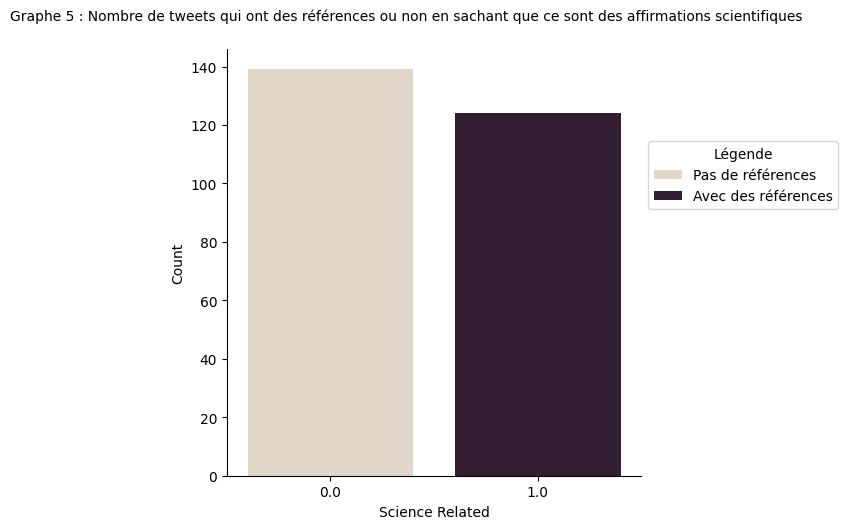

In [ ]:
p5 = sns.catplot(x="scientific_reference", kind="count", palette="ch:.25", data=df[(df['science_related'] == 1) & (df["scientific_claim"]== 1)])
p5.set_axis_labels("Science Related", "Count")
p5.fig.suptitle("Graphe 5 : Nombre de tweets qui ont des références ou non en sachant que ce sont des affirmations scientifiques",fontsize=10, y=1.05)
plt.legend(title="Légende", labels=["Pas de références", "Avec des références"], loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()

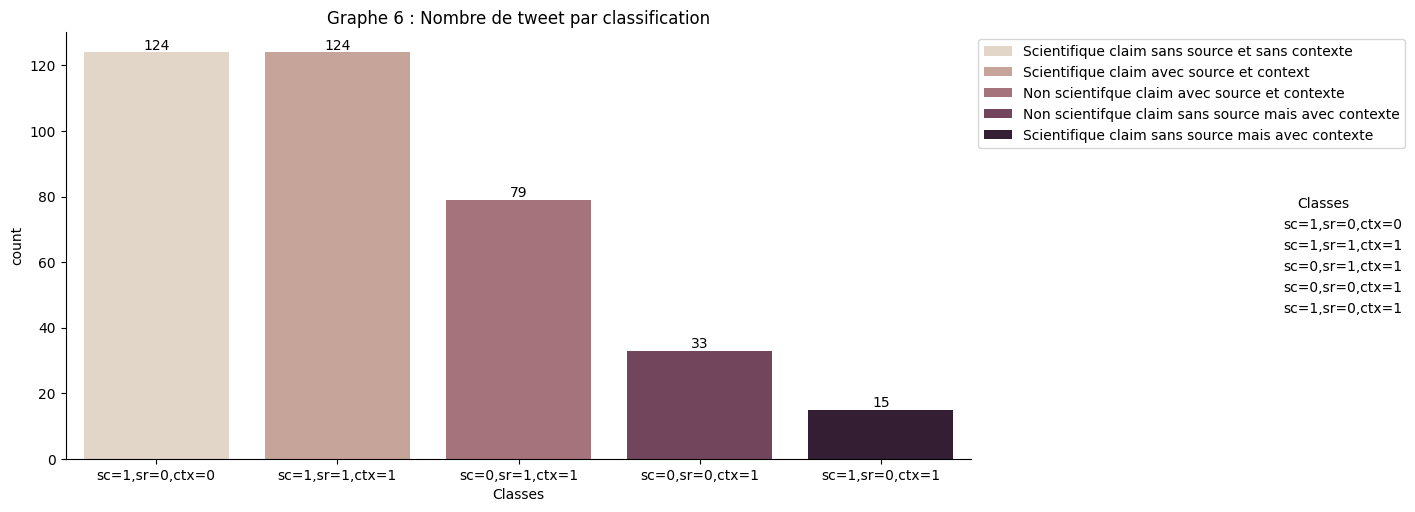

In [ ]:
df['Classes'] = (df[df['science_related']==1]).apply(lambda row: f"sc={int(row['scientific_claim'])},sr={int(row['scientific_reference'])},ctx={int(row['scientific_context'])}", axis=1)
g = sns.catplot(x="Classes", kind="count", palette="ch:.25", data=df, aspect=2)

# Add count labels
ax = g.ax
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position
        p.get_height(),  # Y position
        int(p.get_height()),  # Count value
        ha="center", va="bottom"  # Alignment
    )
plt.title('Graphe 6 : Nombre de tweet par classification')
plt.legend(["Scientifique claim sans source et sans contexte","Scientifique claim avec source et context","Non scientifque claim avec source et contexte","Non scientifque claim sans source mais avec contexte","Scientifique claim sans source mais avec contexte"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
def count_ones_2_columns(df, column_name1, column_name2):
  return (df[(df[column_name1] == 1) & (df[column_name2] == 1)]).sum()

count_ones_2_columns(df, 'scientific_claim', 'scientific_reference')

,0
Unnamed: 0,84996
tweet_id,1249510094076661848
text,“Traffic Jam” In Brain’s Neurons Could Be Caus...
science_related,124
scientific_claim,124.0
scientific_reference,124.0
scientific_context,124.0
Classes,"sc=1,sr=1,ctx=1sc=1,sr=1,ctx=1sc=1,sr=1,ctx=1s..."


In [ ]:
def count_ones(df, column_name):
  return (df[df[column_name] == 1]).sum()

print('sc=', count_ones(df, 'scientific_claim'))
print('sr=', count_ones(df, 'scientific_reference'))
print('ctx=', count_ones(df, 'scientific_context'))

sc= Unnamed: 0                                                         166694
tweet_id                                              5187947180598907076
text                    Can any Gynecologist with Cancer Experience ex...
science_related                                                       263
scientific_claim                                                    263.0
scientific_reference                                                124.0
scientific_context                                                  139.0
Classes                 sc=1,sr=0,ctx=0sc=1,sr=0,ctx=0sc=1,sr=0,ctx=0s...
dtype: object
sr= Unnamed: 0                                                         131085
tweet_id                                             -7398098248144510844
text                    “Traffic Jam” In Brain’s Neurons Could Be Caus...
science_related                                                       203
scientific_claim                                                    124.0
scientific_refer

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tweet_text= df["text"]

In [ ]:
combination_counts = df.groupby(['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']).size().reset_index(name='counts')
display(combination_counts)

,science_related,scientific_claim,scientific_reference,scientific_context,counts
0,0,0.0,0.0,0.0,765
1,1,0.0,0.0,1.0,33
2,1,0.0,1.0,1.0,79
3,1,1.0,0.0,0.0,124
4,1,1.0,0.0,1.0,15
5,1,1.0,1.0,1.0,124


In [ ]:
# Initialize the translator
from googletrans import Translator

translator =Translator()

target_lang = "en"

# Translate each sentence
translations = [await translator.translate(sentence, dest=target_lang) for sentence in tweet_text]


In [ ]:

# Print the translations
for original, translated in zip(tweet_text, translations):
    print(f"{original} → {translated.text}")

Knees are a bit sore. i guess that's a sign that my recent treadmilling is working → Knees are a bit sore. i guess that's a sign that my recent treadmilling is working
McDonald's breakfast stop then the gym 🏀💪 → McDonald's breakfast stop then the gym 🏀💪
Can any Gynecologist with Cancer Experience explain the dangers of Transvaginal Douching with Fluoride or other toxins such as Dioxin? #PDX → Can any Gynecologist with Cancer Experience explain the dangers of Transvaginal Douching with Fluoride or other toxins such as Dioxin? #PDX
Couch-lock highs lead to sleeping in the couch. Gotta stop doing this shit. → Couch-lock highs lead to sleeping in the couch. Gotta stop doing this shit.
Does daily routine help prevent problems with bipolar disorder http://t.co/XGUfUDoLJB → Does daily routine help prevent problems with bipolar disorder http://t.co/XGUfUDoLJB
The Impact of Infertility on You and Your Relationship http://t.co/7pF7Z0wH8f → The Impact of Infertility on You and Your Relationship h

<Axes: xlabel='science_related', ylabel='count'>

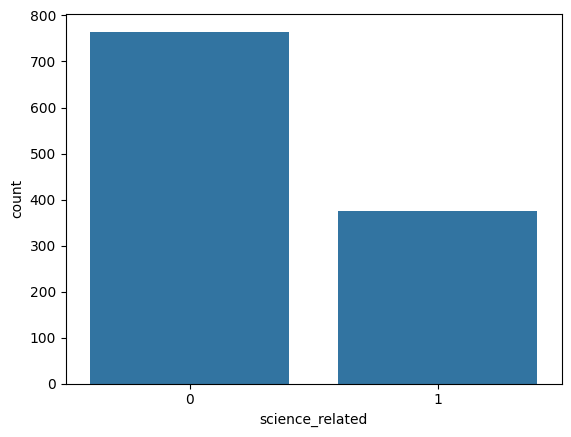

In [ ]:
sns.countplot(x='science_related', data=df)

<Axes: xlabel='science_related', ylabel='count'>

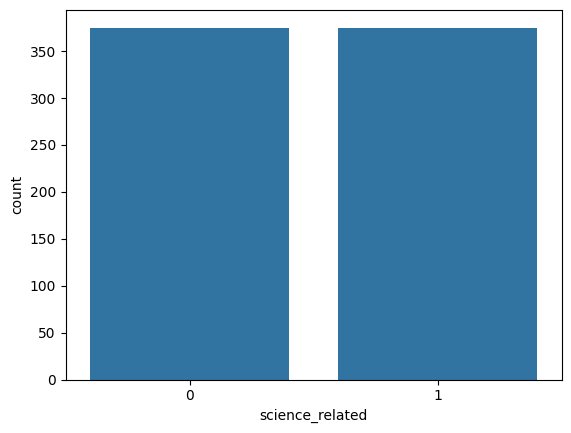

In [ ]:
# Downsampling des tweets non scientifiques
non_scientific_tweets = df[df['science_related'] == 0]
scientific_tweets = df[df['science_related'] == 1]
non_scientific_tweets = non_scientific_tweets.sample(n=scientific_tweets.shape[0])
df_down = pd.concat([scientific_tweets, non_scientific_tweets])
sns.countplot(x='science_related', data=df_down)

In [ ]:
# Affichage des premiers tweets
display(df_down.head()['text'])

for sentence in df_down["text"]:
  sentence = (await translator.translate(sentence, dest=target_lang)).text

,text
2,Can any Gynecologist with Cancer Experience ex...
3,Couch-lock highs lead to sleeping in the couch...
4,Does daily routine help prevent problems with ...
6,“Traffic Jam” In Brain’s Neurons Could Be Caus...
7,Can playing more games improve lives and save ...


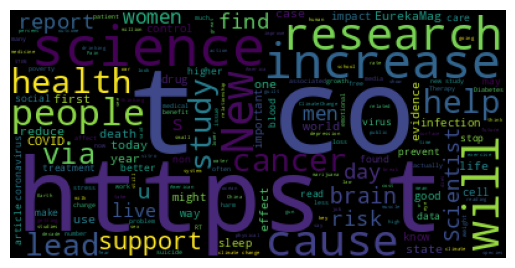

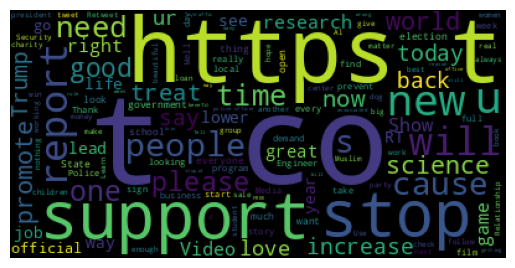

In [ ]:
# Observation des wordclouds pour les tweets scientifiques et non scientifiques

def display_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

display_wordcloud(' '.join(df_down[df_down['science_related'] == 1]['text']))
display_wordcloud(' '.join(df_down[df_down['science_related'] == 0]['text']))

# La présence de liens n'a pas l'air de jouer un rôle dans la classification des tweets

In [ ]:
# Premier prétraitement des tweets
def first_preprocess_text(text):
    # Suppression des URLs
    text = re.sub(r'https?:\/\/\S+', 'LINKY', text)
    # Suppression des caractères spéciaux
    text = re.sub(r'\W', ' ', text)
    # Suppression des underscores
    text = re.sub(r'_', '', text)
    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text)
    # Remplacement des mentions par MENTIONY
    text = re.sub(r'@\w+', 'MENTIONY', text)


    return text

df_down['text'] = df_down['text'].apply(first_preprocess_text)

display(df_down[df_down['science_related'] == 1]['text'].sample(10))
display(df_down[df_down['science_related'] == 0]['text'].sample(10))

,text
722,It s not your fitness tracker it s you LINKY L...
790,crows can memorize people s individual gaits a...
774,How the Brain and Personality Provide Protecti...
1013,We know that coronavirus is a cause for concer...
30,Caution 3D Printers Could Cause Health Problem...
47,billmaher What can we do Bill All the gun law...
399,Mechanism of Metformin A Tale of Two Sites Fre...
183,Is Ebola a health care system mishap
1000,ComfortablySmug EricTrump While Trump didn t ...
112,LEED certified buildings are often less energy...


,text
591,nabsta192 KTHopkins GeoffArsenal Nabil these ...
657,LINKY Corey Feldman reports child abuse claims...
27,BREAKING Somalia Al Shabab ambushes on Kenyan...
1097,Hmph No kidding I do have a dynamite body alth...
1005,We are proud to announce our partnership with ...
322,Tomato Planting Tips That Lead To Healthy Toma...
872,baby boy ur literally 18 stop doing these conc...
576,What does deficiency means to native americans
987,It s about to be CalvinHarris szn all over aga...
452,Asymmetrical matter LINKY science LINKY


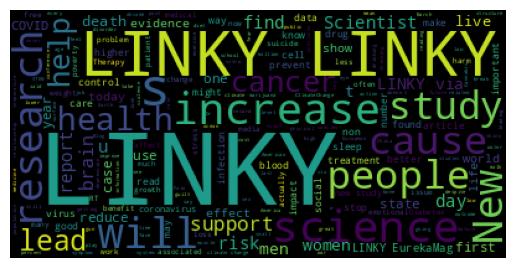

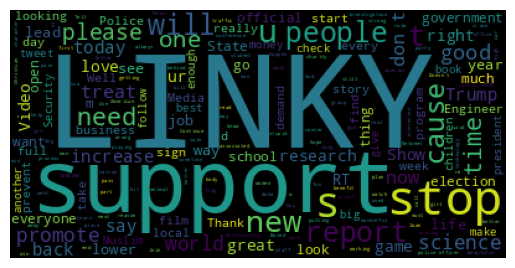

In [ ]:
df_down.to_csv("/content/gdrive/MyDrive/dataset/scitweets_export_preprocessed.tsv", sep='\t')

# Affichage des wordclouds après prétraitement
#1085738081133649920
#1344485313222041600
#1244346345571463172

display_wordcloud(' '.join(df_down[df_down['science_related'] == 1]['text']))
display_wordcloud(' '.join(df_down[df_down['science_related'] == 0]['text']))

In [ ]:
# Second prétraitement des tweets
def second_preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Suppression des stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Suppression des emojis
    tokens = [(emoji.demojize(token) if emoji.is_emoji(token) else token) for token in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

df_down['preprocessed_text'] = df_down['text'].apply(second_preprocess_text)
df_down['preprocessed_text'].sample(10)

,preprocessed_text
391,Vice Always At The House Cause Big Bruh On The...
72,WeLoveAndMissYouZayn OneDirectionPleaseDoAFoll...
814,Gasdermin D Promotes AIM2 Inflammasome Activat...
914,PLEASE STOP SCROLLING I got RT deal ArmyEomma1...
173,also cancer virtually incurable bc cancer diff...
425,According one study men feel decrease sexual a...
189,One day end QE torrent Q3 earnings report cont...
651,AP Mmmmmhmmmm yeah ok sure Well expect say yes...
1113,Researches use Twitter scientist Ten simple ru...
200,Excessive drinking woman 4 drink one occasion ...


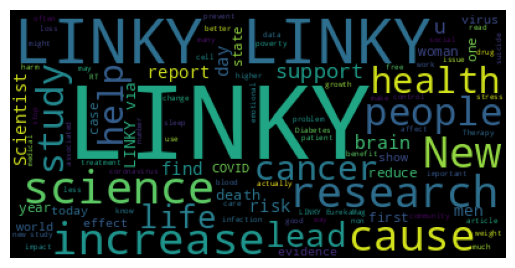

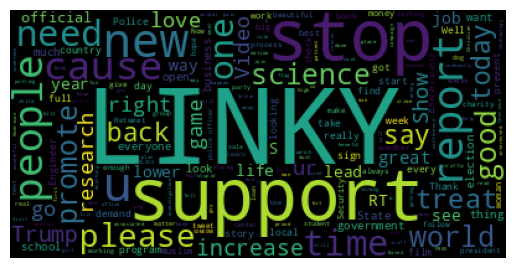

In [ ]:
# Vérification des wordclouds après second prétraitement
display_wordcloud(' '.join(df_down[df_down['science_related'] == 1]['preprocessed_text']))
display_wordcloud(' '.join(df_down[df_down['science_related'] == 0]['preprocessed_text']))

# Équilibrage des données et transformation des charactères spéciaux

## Pattern afin d'éliminer les émojis lors de l'équilibrage des données.

In [ ]:
df_processed = df_down.copy()
df_processed['text'] = df_processed['text'].apply(first_preprocess_text)
df_processed['text'] = df_processed['text'].apply(second_preprocess_text)
display(df_processed.head())
df_processed.to_csv("/content/gdrive/MyDrive/dataset/scitweets_export_preprocessed.tsv", sep='\t')


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context,Classes,preprocessed_text
2,2,322030931022065664,Can Gynecologist Cancer Experience explain dan...,1,1.0,0.0,0.0,"sc=1,sr=0,ctx=0",Can Gynecologist Cancer Experience explain dan...
3,3,322694830620807168,Couch lock high lead sleeping couch Got ta sto...,1,1.0,0.0,0.0,"sc=1,sr=0,ctx=0",Couch lock high lead sleeping couch Got ta sto...
4,4,328524426658328576,Does daily routine help prevent problem bipola...,1,1.0,0.0,0.0,"sc=1,sr=0,ctx=0",Does daily routine help prevent problem bipola...
6,8,333266791960809472,Traffic Jam In Brain Neurons Could Be Cause Of...,1,1.0,1.0,1.0,"sc=1,sr=1,ctx=1",Traffic Jam In Brain Neurons Could Be Cause Of...
7,9,334282732085587968,Can playing game improve life save world chris...,1,1.0,0.0,0.0,"sc=1,sr=0,ctx=0",Can playing game improve life save world chris...


In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
#Upsample scientic tweets



class EmojiContainer:

  def __init__(self):
    self.emoji_list = ['LINKY','MENTIONY']

  def clean_up(self,text):
    return second_preprocess_text(first_preprocess_text(text))

  def register_emoji(self,text):

    for word  in text.split():
      if emoji.is_emoji(word):
        self.emoji_list.append(word)
    return text

  def get_emoji_list(self):
    return self.emoji_list

  def get_ignore_pattern(self):
    return "|".join(self.emoji_list)


# Step 1: Extract emoji

emoji_container = EmojiContainer()

display(scientific_tweets['text'])




scientific_tweets['text'] = scientific_tweets['text'].apply(lambda x: emoji_container.clean_up(x))
scientific_tweets['text'] = scientific_tweets['text'].apply(lambda x: emoji_container.register_emoji(x))

scientific_tweets



# Step 2: Apply augmentation
# aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3,stopwords=emoji_container.get_emoji_list())

# scientific_tweets['text'] = scientific_tweets['text'].apply(lambda x: aug.augment(x))

df_de_merde = pd.DataFrame.from_dict({
    'text': ['Donating blood not only helps others.', 'High school does, in fact ,change people.'],
    'science_related': [1, 1],
    'scientific_claim': [1, 1],
    'scientific_reference': [1, 0],
    'scientific_context': [1, 0]
})

df_de_merde['text'] = df_de_merde['text'].apply(lambda x: emoji_container.clean_up(x))
df_de_merde


,text
2,Can any Gynecologist with Cancer Experience ex...
3,Couch-lock highs lead to sleeping in the couch...
4,Does daily routine help prevent problems with ...
6,“Traffic Jam” In Brain’s Neurons Could Be Caus...
7,Can playing more games improve lives and save ...
...,...
1128,Three systematic reviews & the WHO contradict ...
1130,This looks like a great opportunity to get res...
1131,Highly prestigious and competitive awards fund...
1134,"Vestislav Apostolov, David M. J. Calderbank, E..."


<ipython-input-264-ad137640d52d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientific_tweets['text'] = scientific_tweets['text'].apply(lambda x: emoji_container.clean_up(x))
<ipython-input-264-ad137640d52d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientific_tweets['text'] = scientific_tweets['text'].apply(lambda x: emoji_container.register_emoji(x))


,text,science_related,scientific_claim,scientific_reference,scientific_context
0,Donating blood help others,1,1,1,1
1,High school fact change people,1,1,0,0


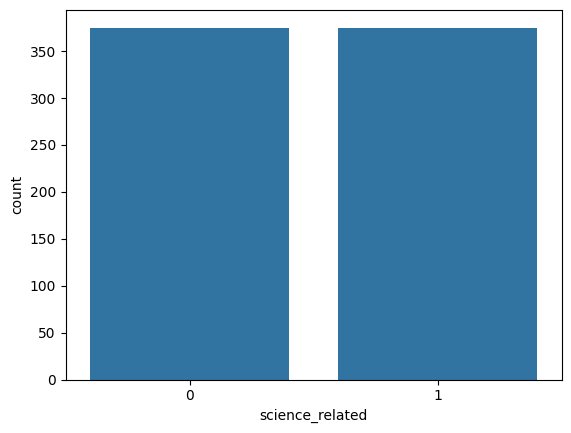

In [ ]:
df_up = pd.concat([scientific_tweets, non_scientific_tweets])
sns.countplot(x='science_related', data=df_up)

df_up.to_csv("/content/gdrive/MyDrive/dataset/scitweets_export_preprocessed.tsv", sep='\t')

In [ ]:
X = df_up["text"]
y = df_up["science_related"]

display(X)
display(y)

,text
2,Can Gynecologist Cancer Experience explain dan...
3,Couch lock high lead sleeping couch Got ta sto...
4,Does daily routine help prevent problem bipola...
6,Traffic Jam In Brain Neurons Could Be Cause Of...
7,Can playing game improve life save world chris...
...,...
631,@michaelkruse @maggieNYT @karaswisher Haberman...
807,"Tomorrow, outside CBI offices nationwide, the ..."
46,@CODEREDDD God see and knw yr heart plus u are...
275,#WeightLoss #Program Conquering The Excess Wei...


,science_related
2,1
3,1
4,1
6,1
7,1
...,...
631,0
807,0
46,0
275,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB


models = {
     "Naive Bayes": {
        "model": MultinomialNB,
        "params" :{'alpha': [0.5, 1.0]}
    },
    'RandomForest': {
        'model': RandomForestClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression,
        'params': {
            'C': [0.1, 1.0, 10],
            'penalty': ['l2'],
            'random_state': [42]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier,
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1]
        }
    },
    "KNN": {
        "model" : KNeighborsClassifier,
        'params' : {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "p": [1, 2]}
    },
    "Decision Tree": {
        "model" : DecisionTreeClassifier,
        'params' : {"criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]}
    },
    "SVM": {
        "model" : SVC,
      "params" :{  "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]}
    },


}

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = []
trained_models = {}

for model_name, config in models.items():
    print(f"\n=== {model_name} ===")
    fold_scores = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"\n-- Fold {fold+1} --")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        base_model = config['model']()
        param_grid = config['params']

        # Create base steps
        pipeline_steps = [('tfidf', TfidfVectorizer())]

        # Add dense conversion if needed (e.g., GaussianNB)
        if isinstance(base_model, GaussianNB):
            pipeline_steps.append(('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)))

        # Add the classifier
        pipeline_steps.append(('clf', base_model))

        # Build the pipeline
        pipeline = Pipeline(pipeline_steps)

        # Adjust param_grid to include the pipeline steps
        param_grid = {f'clf__{k}': v for k, v in param_grid.items()}

        # Convert input texts to string lists
        X_train = X_train.astype(str).tolist()
        X_test = X_test.astype(str).tolist()

        # Set up grid search
        grid_search = GridSearchCV(
            pipeline,
            param_grid=param_grid,
            scoring='f1_macro',
            cv=3,
            n_jobs=-1,
            error_score='raise'  # helpful for debugging
        )

        # Fit model
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_
        trained_models[model_name] = best_model

        # Predict
        y_pred = best_model.predict(X_test)

        # Score
        score = f1_score(y_test, y_pred, average='macro')
        print(f"F1 macro: {score:.4f}")
        fold_scores.append(score)

        cv_score = grid_search.best_score_
        print(f"CV score: {cv_score:.4f}")

        best_params = grid_search.best_params_
        print(f"Best params: {best_params}")

        results.append({
            'model': model_name,
            'fold': fold + 1,
            'f1_score': score,
            'cv_score': grid_search.best_score_,
            'grid_search': grid_search,
            'best_params': grid_search.best_params_,
            'best_estimator': grid_search.best_estimator_,
            'best_score': grid_search.best_score_,
            'best_index': grid_search.best_index_,
        })

    # Average score
    avg_score = np.mean(fold_scores)
    print(f"\n>> Moyenne F1 {model_name}: {avg_score:.4f}")



=== Naive Bayes ===

-- Fold 1 --
F1 macro: 0.9731

-- Fold 2 --
F1 macro: 0.9733

-- Fold 3 --
F1 macro: 0.9333

-- Fold 4 --
F1 macro: 0.9600

-- Fold 5 --
F1 macro: 0.9599

-- Fold 6 --
F1 macro: 0.9732

-- Fold 7 --
F1 macro: 0.9326

-- Fold 8 --
F1 macro: 0.9010

-- Fold 9 --
F1 macro: 0.9729

-- Fold 10 --
F1 macro: 0.9464

>> Moyenne F1 Naive Bayes: 0.9526

=== RandomForest ===

-- Fold 1 --
F1 macro: 0.9864

-- Fold 2 --
F1 macro: 0.9733

-- Fold 3 --
F1 macro: 0.9597

-- Fold 4 --
F1 macro: 0.9333

-- Fold 5 --
F1 macro: 0.9733

-- Fold 6 --
F1 macro: 0.9732

-- Fold 7 --
F1 macro: 0.9729

-- Fold 8 --
F1 macro: 0.9863

-- Fold 9 --
F1 macro: 0.9866

-- Fold 10 --
F1 macro: 0.9733

>> Moyenne F1 RandomForest: 0.9718

=== LogisticRegression ===

-- Fold 1 --
F1 macro: 0.9865

-- Fold 2 --
F1 macro: 1.0000

-- Fold 3 --
F1 macro: 0.9599

-- Fold 4 --
F1 macro: 0.9600

-- Fold 5 --
F1 macro: 0.9733

-- Fold 6 --
F1 macro: 0.9866

-- Fold 7 --
F1 macro: 0.9865

-- Fold 8 --
F1 ma

In [ ]:
results

[{'model': 'Naive Bayes',
  'fold': 1,
  'f1_score': 0.9730989956958394,
  'grid_search': GridSearchCV(cv=3, error_score='raise',
               estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                         ('clf', MultinomialNB())]),
               n_jobs=-1, param_grid={'clf__alpha': [0.5, 1.0]},
               scoring='f1_macro'),
  'best_params': {'clf__alpha': 1.0},
  'best_estimator': Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
  'best_score': np.float64(0.9465087330422143),
  'best_index': np.int64(1)},
 {'model': 'Naive Bayes',
  'fold': 2,
  'f1_score': 0.9733285917496444,
  'grid_search': GridSearchCV(cv=3, error_score='raise',
               estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                         ('clf', MultinomialNB())]),
               n_jobs=-1, param_grid={'clf__alpha': [0.5, 1.0]},
               scoring='f1_macro'),
  'best_params': {'clf__alpha': 1.0},
  'best_es

In [ ]:
import pickle

with open('/content/gdrive/MyDrive/dataset/models', 'wb') as f:
    pickle.dump(models, f)



In [ ]:
# prompt: save trained_models

import pickle

# Assuming 'trained_models' dictionary is defined as in your original code

# Save the trained models to a file
with open('/content/gdrive/MyDrive/dataset/trained_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)


In [ ]:
with open('/content/gdrive/MyDrive/dataset/models', 'rb') as f:
    loaded_models = pickle.load(f)

loaded_models


{'Naive Bayes': {'model': sklearn.naive_bayes.MultinomialNB,
  'params': {'alpha': [0.5, 1.0]}},
 'RandomForest': {'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'n_estimators': [50, 100], 'max_depth': [None, 10]}},
 'LogisticRegression': {'model': sklearn.linear_model._logistic.LogisticRegression,
  'params': {'C': [0.1, 1.0, 10], 'penalty': ['l2']}},
 'GradientBoosting': {'model': sklearn.ensemble._gb.GradientBoostingClassifier,
  'params': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}},
 'KNN': {'model': sklearn.neighbors._classification.KNeighborsClassifier,
  'params': {'n_neighbors': [3, 5, 7, 9, 11],
   'weights': ['uniform', 'distance'],
   'p': [1, 2]}},
 'Decision Tree': {'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': ['gini', 'entropy'],
   'max_depth': [None, 5, 10, 15, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]}},
 'SVM': {'model': sklearn.svm._classes.SVC,
  'params': {'C'

In [ ]:
# prompt: load trained_models

import pickle

# Load the trained models from the file
with open('/content/gdrive/MyDrive/dataset/trained_models.pkl', 'rb') as f:
    loaded_trained_models = pickle.load(f)

# Now you can use the loaded models
# Example:
# model = loaded_trained_models['RandomForest']
# predictions = model.predict(X_test)


In [ ]:
# prompt: test models with the df_final_test

import pickle
from sklearn.metrics import f1_score

# Load the trained models
with open('/content/gdrive/MyDrive/dataset/trained_models.pkl', 'rb') as f:
    loaded_trained_models = pickle.load(f)

# Assuming df_final_test is already loaded and preprocessed like your training data
# X_test = df_final_test["text"]  # Assuming the text data is in the "text" column
# y_test = df_final_test["science_related"] # Assuming the target is in "science_related" column

# Convert input texts to string lists
X_test = df_final_test["text"].apply(lambda x: emoji_container.clean_up(x))
X_text = X_test.astype(str).tolist()
y_test = df_final_test["science_related"]


# Test the models and print the F1 scores
for model_name, model in loaded_trained_models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Model: {model_name}, F1 Score (macro): {f1}")


Model: Naive Bayes, F1 Score (macro): 0.7456306990881459
Model: RandomForest, F1 Score (macro): 0.44049382716049384
Model: LogisticRegression, F1 Score (macro): 0.46527573709472037
Model: GradientBoosting, F1 Score (macro): 0.37449392712550605
Model: KNN, F1 Score (macro): 0.650188679245283
Model: Decision Tree, F1 Score (macro): 0.37449392712550605
Model: SVM, F1 Score (macro): 0.5678871090770404
